<a href="https://colab.research.google.com/github/SimoneFinessi/Python/blob/main/Esercizi_Pandas_Matplotlip_Preverifica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv') 
df

,area,forn,numero_dosi,data_consegna,N1,N2,ISTAT,reg
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
7570,VEN,Moderna,72600,2022-09-26,ITH,ITH3,5,Veneto
7571,VEN,Pfizer/BioNTech,77760,2022-10-20,ITH,ITH3,5,Veneto
7572,VEN,Pfizer Pediatrico,38400,2022-10-31,ITH,ITH3,5,Veneto
7573,VEN,Pfizer/BioNTech,77760,2022-11-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file

In [ ]:
len(df)

7575

In [ ]:
df.count()

area             7575
forn             7575
numero_dosi      7575
data_consegna    7575
N1               7575
N2               7575
ISTAT            7575
reg              7575
dtype: int64

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:
inreg = input('Inserisci la regione.')
len(df[df.reg == inreg])

Inserisci la regione.Veneto


291

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [ ]:
inreg = input('Inserisci la regione: ')
lenght = len(df[df.reg == inreg])
if lenght != 0:
  print(lenght)
else:
  print('La regione non è presente')

Inserisci la regione: Veneto
291


In [ ]:
inreg = input('Inserisci la regione: ') # Made in Loto
lenght = len(df[df.reg == inreg])
if inreg not in list(df['reg']):
  print('La regione non è presente')
else:
  print(lenght)

Inserisci la regione: Vento
La regione non è presente


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [ ]:
inreg = input('Inserisci la regione: ') # Poli sei pietoso
dfonereg = df.groupby('reg').sum()[['numero_dosi']]
dfonereg[dfonereg.index == inreg]['numero_dosi']

Inserisci la regione: Veneto


reg
Veneto    12865842
Name: numero_dosi, dtype: int64

In [ ]:
inreg = input('Inserisci la regione: ') # Poli devi capì che il groupby serve quando il prof te metto 'ogni'
df[df.reg == inreg].sum()[['numero_dosi']]

Inserisci la regione: Veneto


numero_dosi    12865842
dtype: object

5. visualizzare il numero totale di vaccini per ogni fornitore

In [ ]:
df.groupby('forn').sum()[['numero_dosi']].sort_values(by='numero_dosi', ascending=False)

,numero_dosi
forn,
Pfizer/BioNTech,108756123
Moderna,27594944
Vaxzevria (AstraZeneca),11514531
Pfizer Pediatrico,7813693
Janssen,1849471
Novavax,1028600


6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
inreg = input('Inserisci la regione.')

Inserisci la regione.Veneto


In [ ]:
import time
start = time.time() # Poli può solo allacciare le scarpe a Finessi
df[df.reg==inreg].groupby('forn').sum()[['numero_dosi']].sort_values(by=['numero_dosi'], ascending=False)
end = time.time()
print(end - start)

0.009940385818481445


In [ ]:
start = time.time() # Finessi enorme
df.groupby(df.forn[df.reg == inreg]).sum()[['numero_dosi']].sort_values(by=['numero_dosi'], ascending=False)
end = time.time()
print(end - start)

0.006239891052246094


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre verticali e uno a barre orizzontali. Indicare in modo appropriato il titolo, la legenda e le informazioni presenti negli assi

Inserisci la regione: Veneto


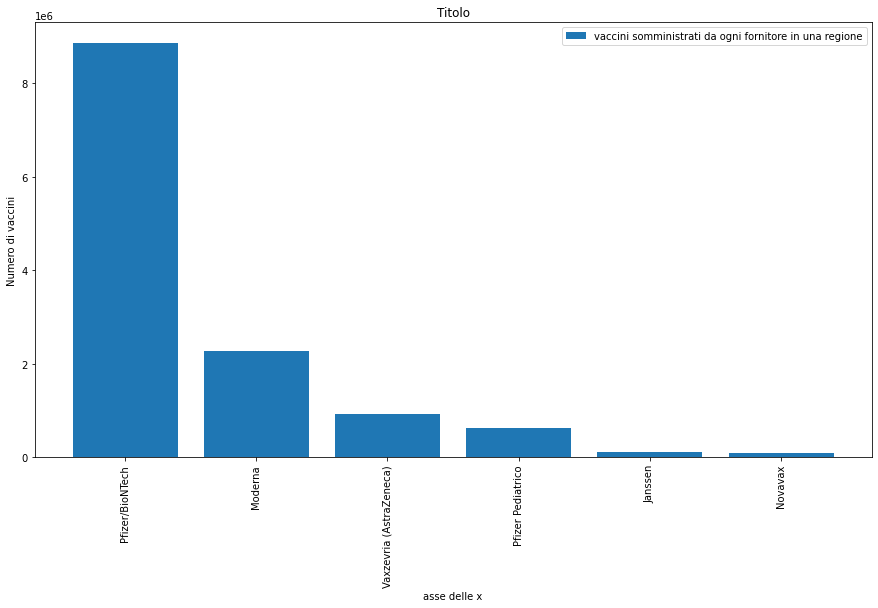

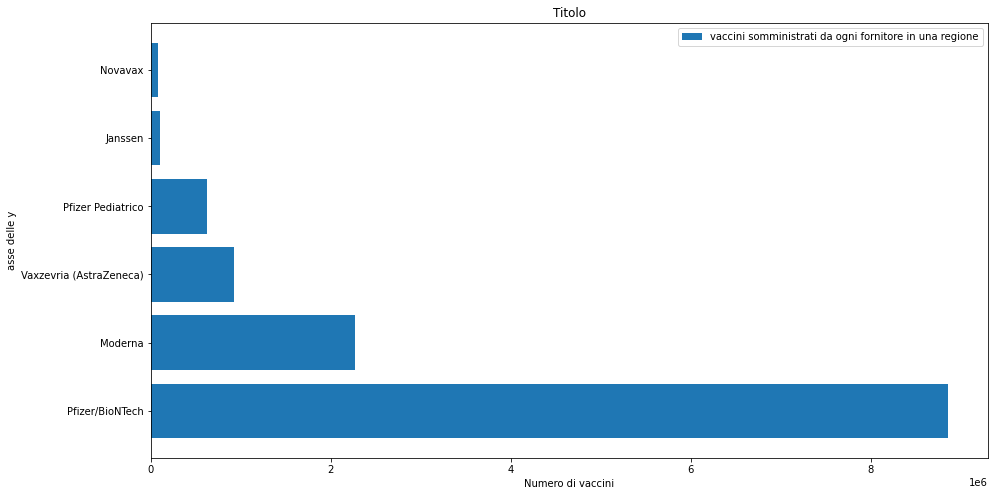

In [ ]:
inreg = input('Inserisci la regione: ') # Poli vai a casa
dfdati = df[df.reg==inreg].groupby('forn').sum()[['numero_dosi']].sort_values(by=['numero_dosi'], ascending=False).reset_index()
labels = dfdati['forn']
dati = dfdati['numero_dosi']


fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='vaccini somministrati da ogni fornitore in una regione')
plt.xticks(rotation=90)
ax.set_title('Titolo')
ax.set_xlabel('asse delle x')
ax.set_ylabel('Numero di vaccini')
ax.legend()

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='vaccini somministrati da ogni fornitore in una regione')
ax.set_title('Titolo')
ax.set_xlabel('Numero di vaccini')
ax.set_ylabel('asse delle y')
ax.legend()

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta

Inserisci la regione: Veneto


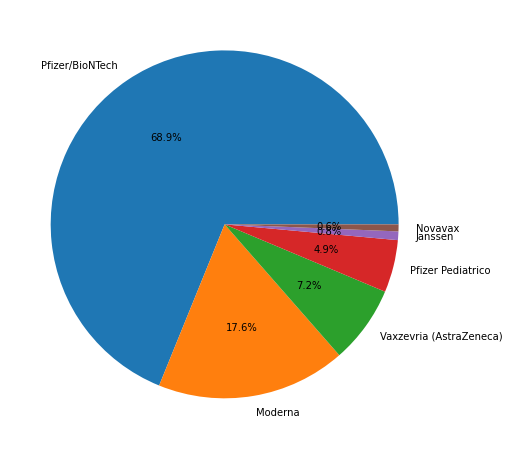

In [ ]:
inreg = input('Inserisci la regione: ')
dfdati = df[df.reg==inreg].groupby('forn').sum()[['numero_dosi']].sort_values(by=['numero_dosi'], ascending=False).reset_index()
labels = dfdati['forn']
dati = dfdati['numero_dosi']

plt.figure(figsize=(15, 8))
plt.pie(dati, labels=labels, autopct='%1.1f%%')
plt.show()

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap (cercare su internet)

In [ ]:
!pip install squarify # Grazie !pip!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Inserisci la regione: Veneto


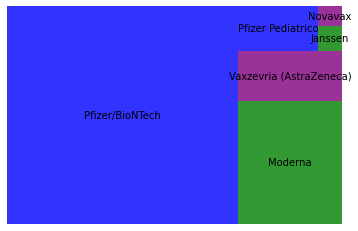

In [ ]:
import squarify

inreg = input('Inserisci la regione: ')
dfdati = df[df.reg==inreg].groupby('forn').sum()[['numero_dosi']].sort_values(by=['numero_dosi'], ascending=False).reset_index()
labels = dfdati['forn']
dati = dfdati['numero_dosi']

squarify.plot(dati, label=labels, alpha=0.8, color=['blue', 'green', 'purple'])
plt.axis('off')
plt.show()

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [ ]:
df.groupby('reg', as_index=False).sum().sort_values(by=['numero_dosi'], ascending=False).head(3)['reg']

8    Lombardia
6        Lazio
3     Campania
Name: reg, dtype: object

11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media dei vaccini consegnati nelle regioni

In [ ]:
dfoup = df.groupby('reg').sum()[['numero_dosi']] > df.groupby('reg', as_index=False).sum()[['numero_dosi']].mean()
dfoup[dfoup.numero_dosi == True].drop('numero_dosi', axis=1) # axis=1 : colonne ; axis=0 : righe

""
reg
Campania
Emilia-Romagna
Lazio
Lombardia
Piemonte
Puglia
Sicilia
Toscana
Veneto


12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli ultimi sei mesi. Fare in modo che la data sia determinata in modo automatico (cercare su internet)


<BarContainer object of 2 artists>

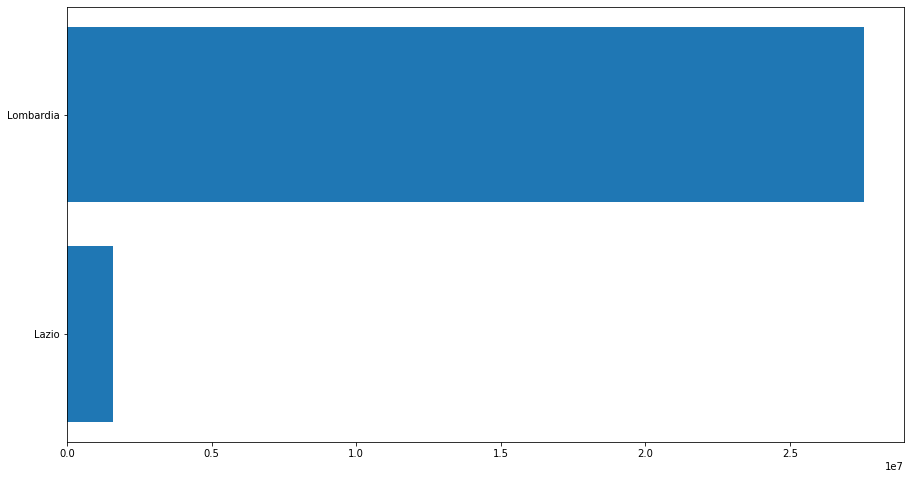

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta  
sdata = datetime.datetime.now() - relativedelta(months = 6) # calcola la data di 6 mesi fa
datas = pd.to_datetime(df.data_consegna, format="%Y-%m-%d") # crea una serie contenente le date in forma di datetime

dfdati= df[(df.reg == 'Lombardia') | (df.reg == 'Lazio') & (datas > sdata)].groupby('reg').sum()[['numero_dosi']]
dati = dfdati['numero_dosi']
labels = dfdati.index

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='vaccini somministrati in una regione') 